# **1. Perkenalan Dataset**


Sumber Dataset : Kaggle 
Link Dataset : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data



Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
df = pd.read_csv('../car-prediction_raw/car data.csv') 
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
#Missing value 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Distribusi Fitur  Numerik

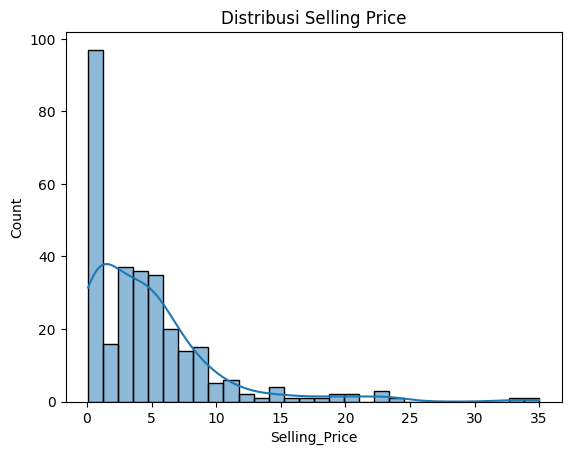

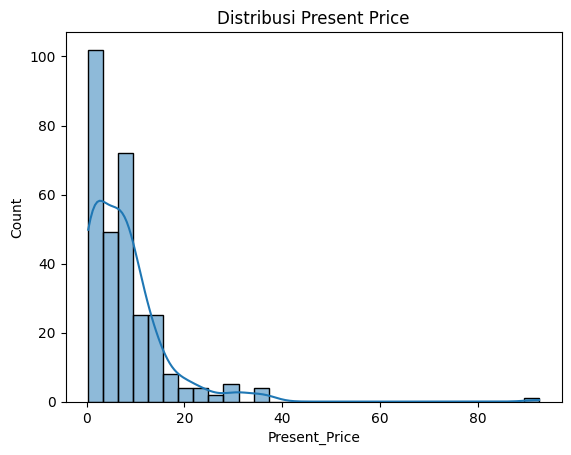

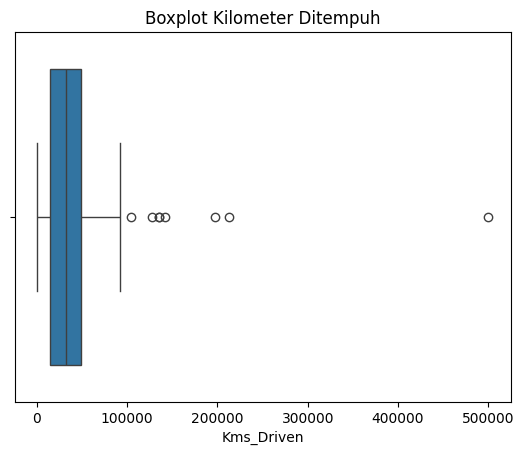

In [11]:
# selling price
sns.histplot(df['Selling_Price'], kde=True, bins=30)
plt.title("Distribusi Selling Price")
plt.show()

#present price
sns.histplot(df['Present_Price'], kde=True, bins=30)
plt.title("Distribusi Present Price")
plt.show()

#Kolometer tempuh
sns.boxplot(x=df['Kms_Driven'])
plt.title("Boxplot Kilometer Ditempuh")
plt.show()



Korelasi Fitur Numerik

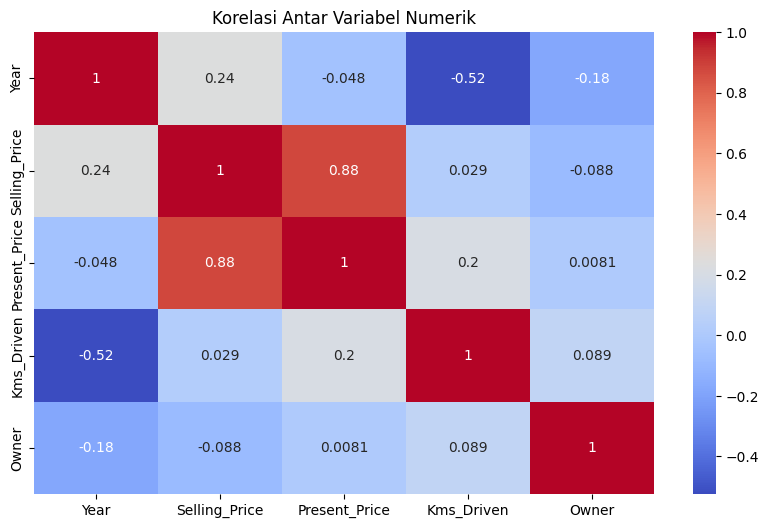

In [16]:
# Ambil hanya kolom numerik
df_corr = df.select_dtypes(include='number')

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Variabel Numerik")
plt.show()




Analisis Fitur Kategorikal

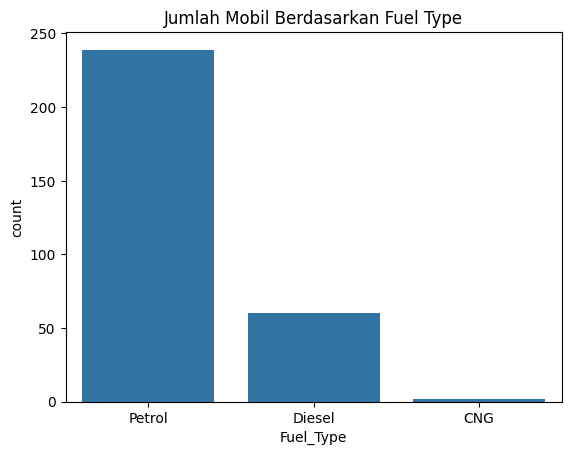

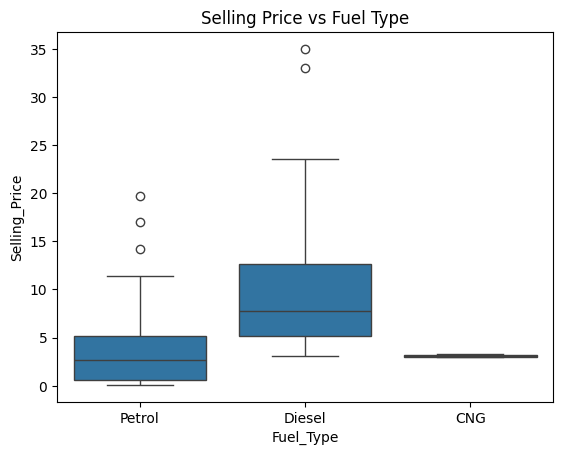

In [17]:
# Fuel Type
sns.countplot(x='Fuel_Type', data=df)
plt.title("Jumlah Mobil Berdasarkan Fuel Type")
plt.show()

sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Selling Price vs Fuel Type")
plt.show()


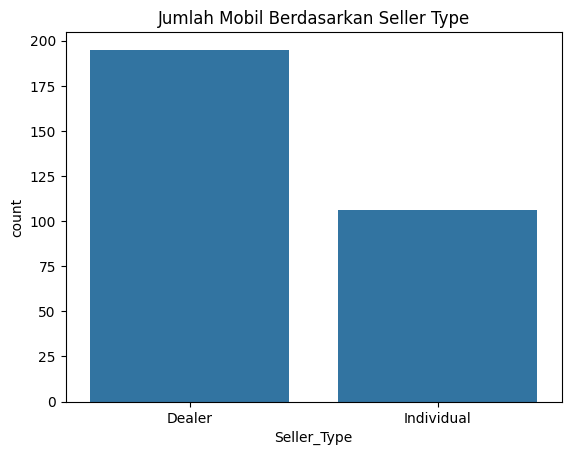

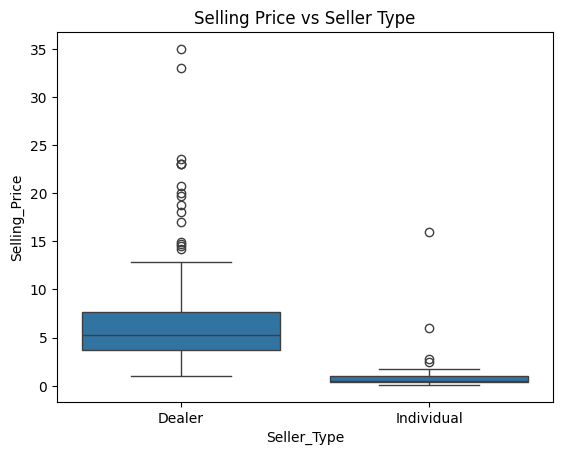

In [18]:
# Seller Type
sns.countplot(x='Seller_Type', data=df)
plt.title("Jumlah Mobil Berdasarkan Seller Type")
plt.show()

sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title("Selling Price vs Seller Type")
plt.show()


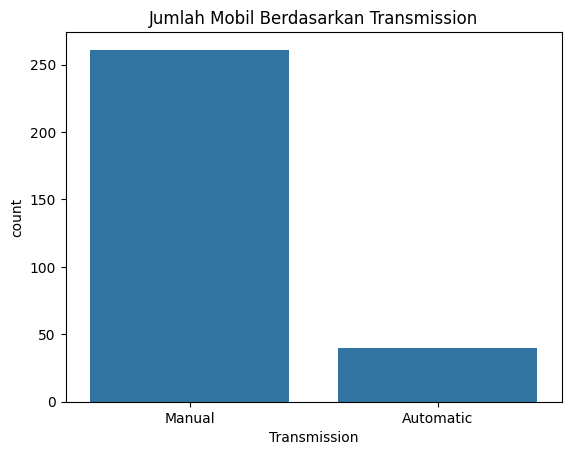

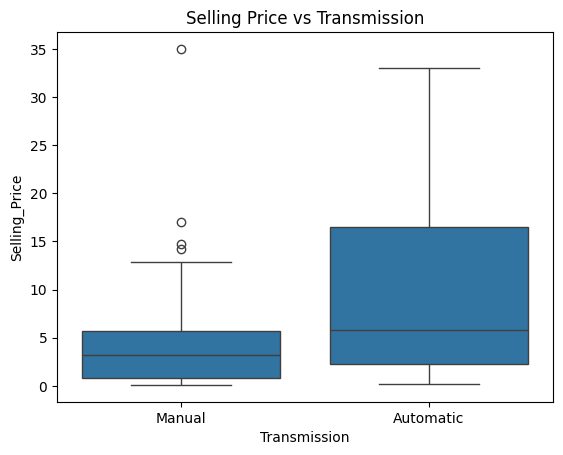

In [20]:
#Transmission 
sns.countplot(x='Transmission', data=df)
plt.title("Jumlah Mobil Berdasarkan Transmission")
plt.show()

sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title("Selling Price vs Transmission")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Menambahkan fitur baru yaitu menghitung umur mobil

df['Car_Age'] = 2025 - df['Year']
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

In [ ]:
# menghilangkan outlier berdasarkan Kms_Driven 
Q1 = df['Kms_Driven'].quantile(0.25)
Q3 = df['Kms_Driven'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['Kms_Driven'] >= lower) & (df['Kms_Driven'] <= upper)]

In [31]:
# memisahka fitur dan target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [30]:
numerical_cols = ['Present_Price', 'Kms_Driven', 'Car_Age']
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])


In [33]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Transform X
X_train_processed = model_pipeline.fit_transform(X_train)
X_test_processed = model_pipeline.transform(X_test)